# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

weather_api_key = "0ea378f548b2698ef846871fa5b5e0bb"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | borba
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | palikir - national government center
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | whyal

Processing Record 38 of Set 4 | dillon
Processing Record 39 of Set 4 | dwarka
Processing Record 40 of Set 4 | kourou
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | el colomo
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | tionk essil
Processing Record 45 of Set 4 | udachny
Processing Record 46 of Set 4 | qala i naw
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | inirida
Processing Record 49 of Set 4 | colonia
Processing Record 0 of Set 5 | kishorganj
Processing Record 1 of Set 5 | yuzhno-kurilsk
Processing Record 2 of Set 5 | papatowai
Processing Record 3 of Set 5 | hanceville
Processing Record 4 of Set 5 | midvagur
Processing Record 5 of Set 5 | valparaiso
Processing Record 6 of Set 5 | kidal
Processing Record 7 of Set 5 | queenstown
Processing Record 8 of Set 5 | grand falls-windsor
Processing Record 9 of Set 5 | kintampo
Processing Record 10 of Set 5 | fort stockton
Processing Record 11 of Set 5 | afaah

Processing Record 31 of Set 8 | lebu
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | ishigaki
Processing Record 34 of Set 8 | zabol
Processing Record 35 of Set 8 | santo amaro da imperatriz
Processing Record 36 of Set 8 | hammerfest
Processing Record 37 of Set 8 | ebaye
Processing Record 38 of Set 8 | floro
Processing Record 39 of Set 8 | hotan
Processing Record 40 of Set 8 | maintirano
Processing Record 41 of Set 8 | rehoboth
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | cairns city
City not found. Skipping...
Processing Record 44 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 45 of Set 8 | obock
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | turrialba
Processing Record 49 of Set 8 | saint-joseph
Processing Record 0 of Set 9 | nadym
Processing Record 1 of Set 9 | padang
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of 

Processing Record 19 of Set 12 | christchurch
Processing Record 20 of Set 12 | puno
Processing Record 21 of Set 12 | magadan
Processing Record 22 of Set 12 | pike road
Processing Record 23 of Set 12 | awjilah
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | kiunga
Processing Record 26 of Set 12 | arti
Processing Record 27 of Set 12 | brookings
Processing Record 28 of Set 12 | mikhaylov
Processing Record 29 of Set 12 | kolonia town
Processing Record 30 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 31 of Set 12 | san-pedro
Processing Record 32 of Set 12 | fort wellington
Processing Record 33 of Set 12 | ouellah
City not found. Skipping...
Processing Record 34 of Set 12 | jiangyou
Processing Record 35 of Set 12 | el obeid
Processing Record 36 of Set 12 | tofol
Processing Record 37 of Set 12 | mukah
City not found. Skipping...
Processing Record 38 of Set 12 | playa del ingles
Processing Record 39 of Set 12 | pemba
Processing Record 40 o

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,66.88,89,42,10.85,AO,1693417970
1,adamstown,-25.0660,-130.1015,70.16,90,99,20.40,PN,1693417970
2,petropavlovsk-kamchatsky,53.0452,158.6483,45.19,100,0,6.71,RU,1693417970
3,invercargill,-46.4000,168.3500,48.02,72,76,10.00,NZ,1693417970
4,talnakh,69.4865,88.3972,45.21,79,30,2.24,RU,1693417970


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\jdaiu\Python_API_Challenge\output_data\cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\jdaiu\Python_API_Challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,66.88,89,42,10.85,AO,1693417970
1,adamstown,-25.0660,-130.1015,70.16,90,99,20.40,PN,1693417970
2,petropavlovsk-kamchatsky,53.0452,158.6483,45.19,100,0,6.71,RU,1693417970
3,invercargill,-46.4000,168.3500,48.02,72,76,10.00,NZ,1693417970
4,talnakh,69.4865,88.3972,45.21,79,30,2.24,RU,1693417970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

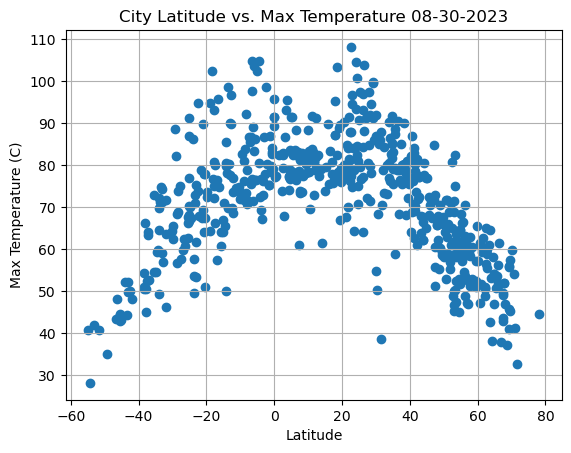

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\jdaiu\Python_API_Challenge\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

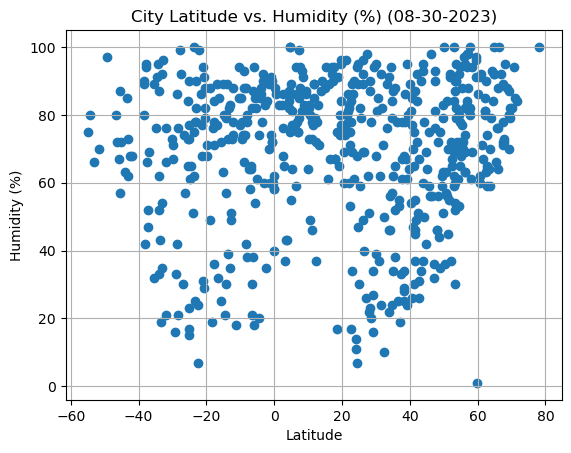

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\jdaiu\Python_API_Challenge\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

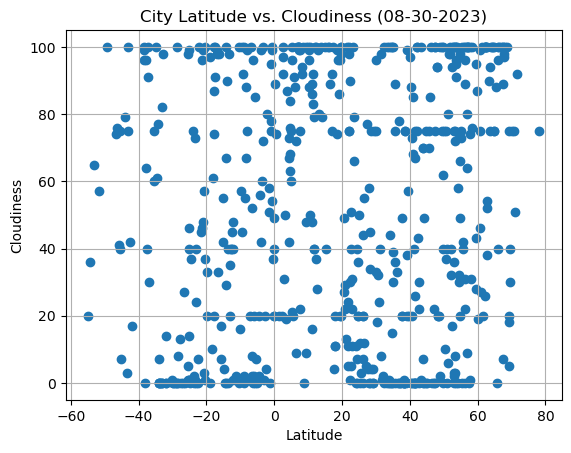

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\jdaiu\Python_API_Challenge\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

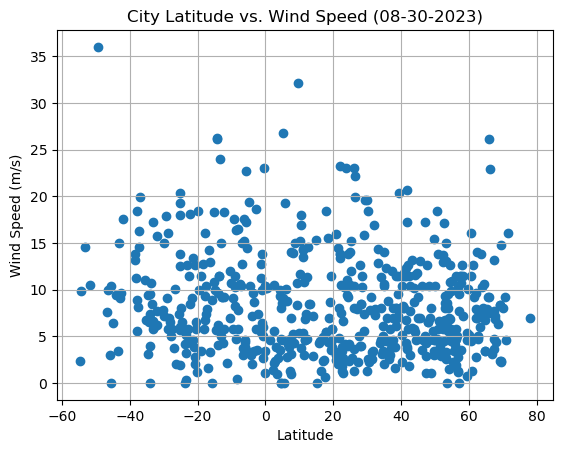

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\jdaiu\Python_API_Challenge\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the linear regression on a scatterplot and print the regression value
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,petropavlovsk-kamchatsky,53.0452,158.6483,45.19,100,0,6.71,RU,1693417970
4,talnakh,69.4865,88.3972,45.21,79,30,2.24,RU,1693417970
5,albany,42.6001,-73.9662,77.18,67,30,3.00,US,1693417349
7,la ronge,55.1001,-105.2842,68.25,68,75,4.61,CA,1693417971
10,hawaiian paradise park,19.5933,-154.9731,76.03,96,100,5.75,US,1693417972


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,66.88,89,42,10.85,AO,1693417970
1,adamstown,-25.0660,-130.1015,70.16,90,99,20.40,PN,1693417970
3,invercargill,-46.4000,168.3500,48.02,72,76,10.00,NZ,1693417970
6,borba,-4.3878,-59.5939,104.79,20,2,3.33,BR,1693417970
8,waitangi,-43.9535,-176.5597,52.11,63,79,9.44,NZ,1693417971


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7358600505744612


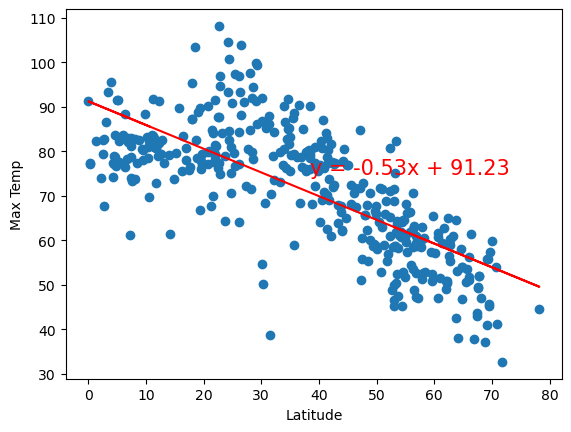

None


In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.7363500040265608


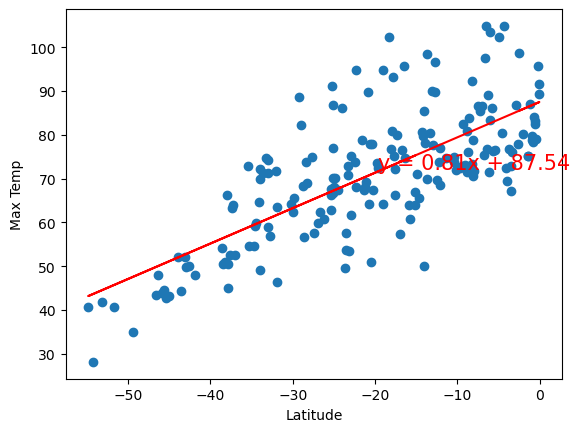

None


In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** There is a negative correlation between Temperature and Latitude in the Northern Hemisphere, meanwhile there is a positive relationship in the Southern Hemisphere. This makes sense considering that places are generally more humid the closer to the equator you are.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.022950622121371708


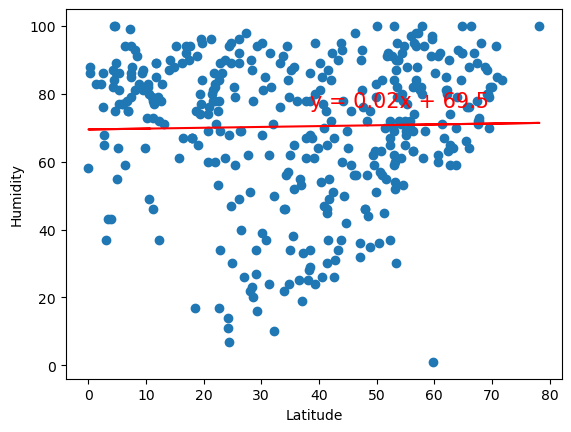

None


In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.003579337251495698


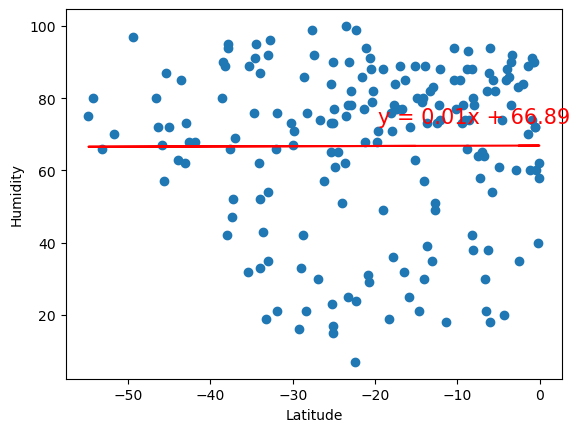

None


In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** While correlations between both the Northern and Southern Hemispheres are positive in relation to Humidity, the correlation is rather weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.026987720300338542


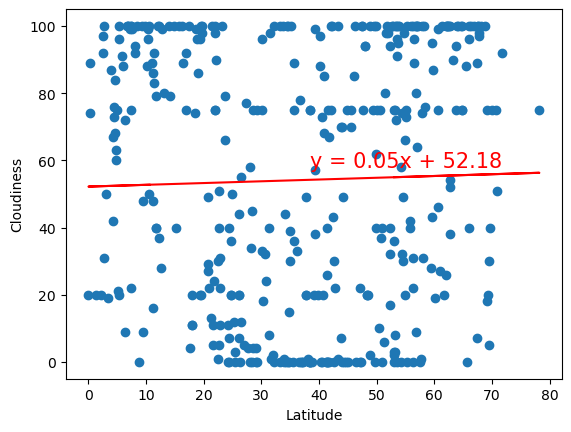

None


In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.009332860510266522


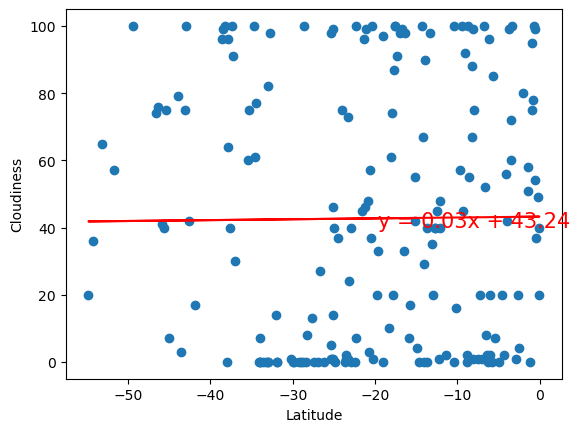

None


In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Similarly to the Humidity scatterplots, the correlation between both hemispheres and Cloudiness is positive but weak, and therefore insignificant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.021455135537915927


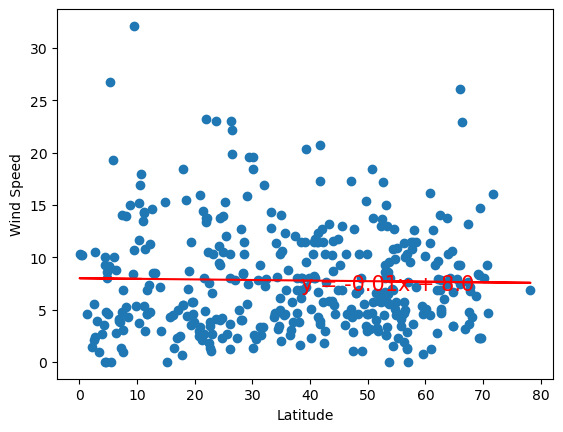

None


In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.03704506790473302


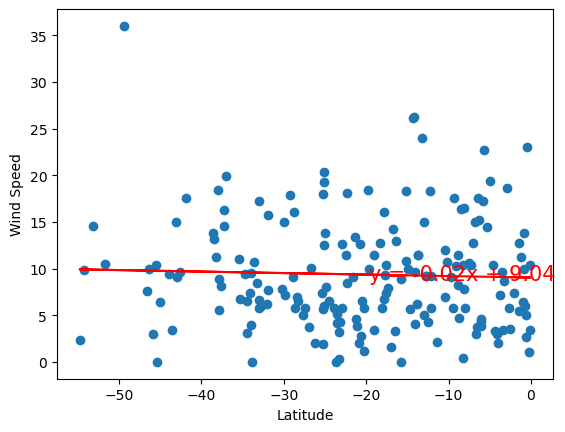

None


In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** The linear regression here is the same as the previous two, except this time both correlations are slightly negative instead.